## LinearRegression Class Implementation

In [264]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.errors = []
        
    def mse(self, y_true, y_predicted):
        return np.mean((y_true - y_predicted)**2)
    
    def score(self, y_true, y_predicted):
        r2 = 1 - np.sum((y_true - y_predicted)**2) / np.sum((y_true - y_true.mean())**2)
        return r2
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            self.errors.append(self.mse(y, y_predicted))
            
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

## Loading & Splitting Dataset

In [265]:
import pandas as pd
import math
import matplotlib.pyplot as plt

def train_test_split(X, Y, test_size):
    dataset_length = len(Y)
    train_length = math.ceil(dataset_length * (1 - test_size))
    return X[:train_length], X[train_length:], Y[:train_length], Y[train_length:]

def normalization(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

df = pd.read_csv('house_data.csv')

X = np.array(df[['sqft_living']])
X = normalization(X)
Y = np.array(df['price'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Plotting The Original Dataset

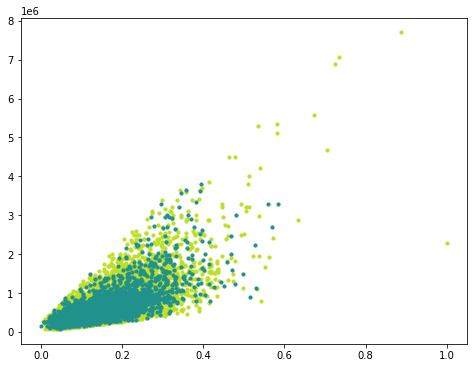

In [266]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.show()

## Training & Testing The Model

In [267]:
regressor = LinearRegression(lr=0.67)
regressor.fit(X_train, y_train)

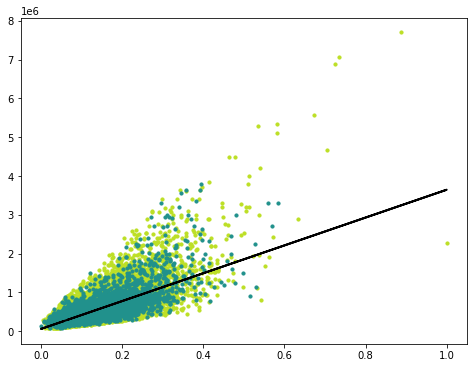

In [268]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="prediction")
plt.show()

## Errors for all iterations in gradient descent 

In [269]:
print(regressor.errors)

print("MSE = %s" % regressor.errors[-1])

[418238411733.69495, 160083327998.0194, 133619651575.79489, 130597915390.37106, 129949867865.32143, 129544057506.3618, 129164836227.51558, 128790374540.36218, 128418451326.94963, 128048829291.79005, 127681471916.33018, 127316363070.84587, 126953488764.42056, 126592835298.15657, 126234389077.87549, 125878136594.70953, 125524064422.68068, 125172159218.00114, 124822407718.55107, 124474796743.37672, 124129313192.19356, 123785944044.8924, 123444676361.04886, 123105497279.43556, 122768394017.53757, 122433353871.07057, 122100364213.50206, 121769412495.5756, 121440486244.8378, 121113573065.16827, 120788660636.31255, 120465736713.41759, 120144789126.57053, 119825805780.33994, 119508774653.31993, 119193683797.67725, 118880521338.70082, 118569275474.35445, 118259934474.83177, 117952486682.11455, 117646920509.53294, 117343224441.3291, 117041387032.22313, 116741396906.98161, 116443242759.98915, 116146913354.82213, 115852397523.82524, 115559684167.69073, 115268762255.04002, 114979620822.00798, 11469

## Predictions on new data (testing the model)

In [270]:
predicted_linear = regressor.predict(X_test)
print(predicted_linear)

[591854.10432655 375100.10143278 323621.0257455  ... 253175.97480503
 410322.62690301 253175.97480503]


In [271]:
print('Test Accuracy: {:.2f} %'.format(regressor.score(y_test, predicted_linear) * 100))

Test Accuracy: 49.40 %


## Testing different learning rates

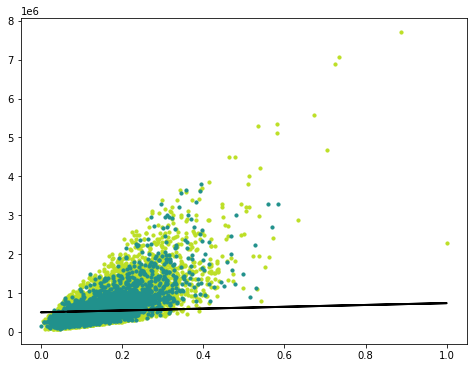

Test Accuracy: 5.65 %


In [272]:
regressor_test_1 = LinearRegression(lr=0.01)
regressor_test_1.fit(X_train, y_train)

y_pred_line = regressor_test_1.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="prediction")
plt.show()

predicted_linear_test_1 = regressor_test_1.predict(X_test)
print('Test Accuracy: {:.2f} %'.format(regressor_test_1.score(y_test, predicted_linear_test_1) * 100))

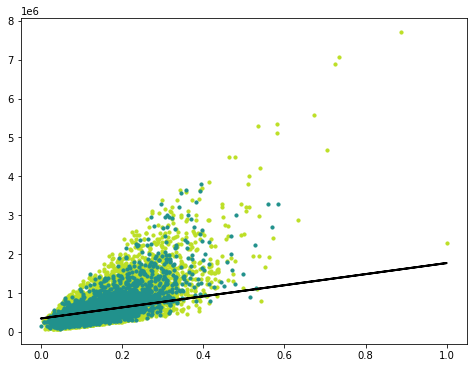

Test Accuracy: 31.31 %


In [273]:
regressor_test_2 = LinearRegression(lr=0.1)
regressor_test_2.fit(X_train, y_train)

y_pred_line = regressor_test_2.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="prediction")
plt.show()


predicted_linear_test_2 = regressor_test_2.predict(X_test)
print('Test Accuracy: {:.2f} %'.format(regressor_test_2.score(y_test, predicted_linear_test_2) * 100))

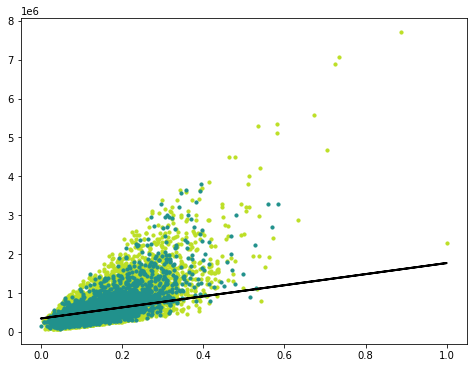

Test Accuracy: 49.33 %


In [274]:
regressor_test_3 = LinearRegression(lr=0.9)
regressor_test_3.fit(X_train, y_train)

y_pred_line = regressor_test_2.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="prediction")
plt.show()


predicted_linear_test_3 = regressor_test_3.predict(X_test)
print('Test Accuracy: {:.2f} %'.format(regressor_test_3.score(y_test, predicted_linear_test_3) * 100))

## MultiLinearRegression Class Implementation

In [275]:
import numpy as np

class MultiLinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.errors = []
        
    def mse(self, y_true, y_predicted):
        return np.mean((y_true - y_predicted)**2)
    
    def score(self, y_true, y_predicted):
        r2 = 1 - np.sum((y_true - y_predicted)**2) / np.sum((y_true - y_true.mean())**2)
        return r2
    
    def cost_function(self, X):
        y = self.bias
        y += np.dot(X, self.weights)
        return y.reshape(y.shape[0], 1)
        
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.weights = self.weights.reshape(self.weights.shape[0], 1)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_predicted = self.cost_function(X)
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            self.errors.append(self.mse(y, y_predicted))
            
    def predict(self, X):
        y_predicted = self.cost_function(X)
        return y_predicted

## Loading & Splitting Dataset

In [276]:
X = np.array(df[['grade', 'bathrooms', 'lat', 'sqft_living', 'view']])

def multi_normalization(data):
    n_columns = data.shape[1]
    for i in range(n_columns):
        data[:, i] = (data[:, i] - np.min(data[:, i])) / (np.max(data[:, i]) - np.min(data[:, i]))
        
multi_normalization(X)
Y = np.array(df['price'])

Y = Y.reshape(Y.shape[0], 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8)

### Training & Testing The Model

In [277]:
multi_regressor = MultiLinearRegression(lr=1.092, n_iters=1000)
multi_regressor.fit(X_train, y_train)

## Errors for all iterations in gradient descent 

In [278]:
print(multi_regressor.errors)

print("MSE = %s" % multi_regressor.errors[-1])

[441660978094.1432, 435996077235.0392, 430575846892.74475, 425383060172.7853, 420401840779.81555, 415617554002.2651, 411016706602.4806, 406586854879.80634, 402316520234.621, 398195111616.89026, 394212854293.7249, 390360724417.1339, 386630388915.99274, 383014150275.52356, 379504895803.6032, 376096051016.2476, 372781536804.9242, 369555730076.13, 366413427579.16473, 363349812661.40765, 360360424711.8521, 357441131073.3293, 354588101221.8975, 351797783028.43005, 349066880932.6268, 346392335873.6066, 343771306834.03186, 341201153866.4358, 338679422481.19965, 336203829285.497, 333772248771.5894, 331382701161.1736, 329033341220.114, 326722447964.9011, 324448415188.6006, 322209742739.9655, 320005028494.792, 317832960963.5761, 315692312484.0894, 313581932951.67883, 311500744043.9444, 309447733899.97424, 307421952217.55896, 305422505734.78436, 303448554065.1256, 301499305857.68646, 299574015256.51636, 297671978635.0623, 295792531583.7492, 293935046130.46844, 292098928175.3907, 290283615123.02216

## Predictions on new data (testing the model)

In [279]:
predicted = multi_regressor.predict(X_test)

print('Test Accuracy: {:.2f} %'.format(multi_regressor.score(y_test, predicted) * 100))

Test Accuracy: 63.74 %


### Testing different learning rates

In [280]:
multi_regressor_test_1 = MultiLinearRegression(lr=0.1)
multi_regressor_test_1.fit(X_train, y_train)
predicted = multi_regressor_test_1.predict(X_test)

print('Test Accuracy: {:.2f} %'.format(multi_regressor_test_1.score(y_test, predicted) * 100))

Test Accuracy: 59.06 %


In [281]:
multi_regressor_test_2 = MultiLinearRegression(lr=0.25)
multi_regressor_test_2.fit(X_train, y_train)
predicted = multi_regressor_test_2.predict(X_test)

print('Test Accuracy: {:.2f} %'.format(multi_regressor_test_2.score(y_test, predicted) * 100))

Test Accuracy: 61.88 %


In [282]:
multi_regressor_test_3 = MultiLinearRegression(lr=0.999)
multi_regressor_test_3.fit(X_train, y_train)
predicted = multi_regressor_test_3.predict(X_test)

print('Test Accuracy: {:.2f} %'.format(multi_regressor_test_3.score(y_test, predicted) * 100))

Test Accuracy: 63.68 %
